### Import cytview, pandas and matplotlib


In [1]:
import cytview as cv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Read your experimental results into a pandas dataframe

In [4]:
"""
Read the dataset into python as a DataFrame object using pandas. An example dataset 
has been included within this project to assist with formatting the input table. In this
case "MetaData_Well" is our single-cell identifier and "Measurement_1" is the feature
we are interested in analysing. It is important that the measurements are numerical.
"""

df = pd.read_csv("dataset/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


### Plot and analyse your measurements of interest

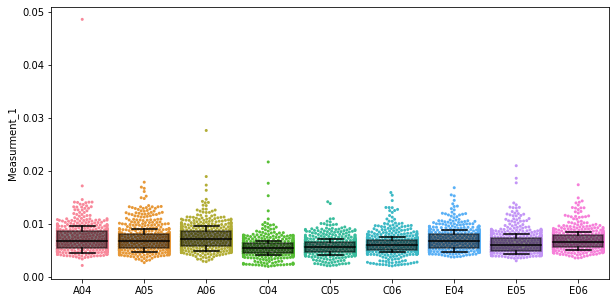

In [5]:
"""
Use cell_plot() to randomly sample a subset of experimental observations and plot the data.
CytView makes use of seaborn's swarmplot() and boxplot() functions and thus any plot-related
parameters can be tweaked using matplotlib. Note: the default number of observations sampled
is 500, this can be changed using the obs_max argument.
"""

plt.figure(figsize=[10,5])

plot = cv.cell_plot(df, measurement= "Measurement_1", identifier= "Metadata_Well")
plt.ylabel("Measurment_1")
plt.show()

In [6]:
"""
cell_plot() returns a dictionary containing both the sampled dataframe and summarised results
"""

# show the sampled dataframe
plot["dataframe"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
2992,0.005393,0.007095,0.007681,0.006268,0.010069,0.006966,0.005513,0.005446,0.008745
2047,0.010285,0.013094,0.007984,0.005696,0.005441,0.004958,0.004888,0.007168,0.007394
4853,0.005883,0.008344,0.008789,0.005252,0.005065,0.006706,0.010774,0.005271,0.007562
1416,0.008733,0.004293,0.008352,0.006483,0.004487,0.004825,0.006092,0.005151,0.009851
4626,0.004798,0.007414,0.004834,0.002457,0.002310,0.004375,0.008843,0.004514,0.008049
...,...,...,...,...,...,...,...,...,...
3645,0.009098,0.004651,0.006998,0.005798,0.004700,0.007368,0.007758,0.004133,0.010987
2782,0.011804,0.008592,0.011070,0.005262,0.005588,0.005889,0.005027,0.005279,0.005762
1966,0.004720,0.004419,0.014269,0.004558,0.004662,0.005527,0.006425,0.008598,0.006807
1224,0.005429,0.010893,0.009181,0.005725,0.006260,0.010523,0.008059,0.005333,0.006011


In [7]:
# summary of dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.007370,0.007205,0.007502,0.005591,0.005850,0.006226,0.007062,0.006470,0.006991
std,0.002947,0.002461,0.002439,0.001819,0.001659,0.001934,0.002010,0.002166,0.001904
min,0.002205,0.002735,0.002918,0.002017,0.002150,0.002118,0.003775,0.003076,0.003610
25%,0.005507,0.005496,0.005818,0.004631,0.004721,0.005197,0.005556,0.004980,0.005687
50%,0.006859,0.006743,0.007146,0.005437,0.005723,0.005975,0.006735,0.005985,0.006664
75%,0.008699,0.008217,0.008725,0.006366,0.006663,0.006990,0.008160,0.007383,0.007881
max,0.048536,0.017882,0.027617,0.021686,0.014199,0.015937,0.016839,0.020979,0.017396


### Analyse replicate data and perform statistical analysis

Sample 1 vs Sample 2 : p value:  0.00322  ( ** )
Sample 2 vs Sample 3 : p value:  0.040209  ( * )


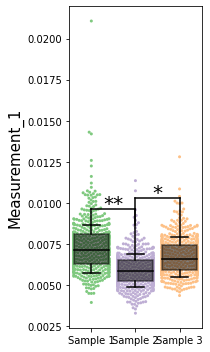

In [8]:
"""
If you have replicate samples you can utilise the group_plot() function to merge, plot
and perform statistics on your dataset. Note: you need to specify at least 2 independent 
replicates in order to use this function.
"""

plt.figure(figsize=[3,5])


"""
Define your groupings as set out below. In this case we're interested in comparing wells
A04, A05, A06 versus C04, C05, C06 versus E04, E05, E06. 
"""
groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

# Provide user-defined labels for each grouping
labels = ["Sample 1", "Sample 2", "Sample 3"]

"""
Choose which groups to compare by their indexes, this will perform a one-way ANOVA
between the means of Sample 1 vs Sample 2 as well as Sample 2 vs Sample 3.
"""
compare = [[0,1],[1,2]]

"""
Plot the data and specify the groupings, labels and comparisons with the function arguments.
Note: set draw = True in order to draw lines between groups and visualise statistical significance. 
"""

plot = cv.group_plot(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", 
                     groupings=groupings, labels = labels, compare=compare, draw=True)
plt.tight_layout()
plt.show()

### View the dataframe generated from replicates and output the summary data

In [9]:
"""
View the grouped dataframe. Note: similarly to the cell_plot() function the data has been down-sampled. 
In order to adjust the number of observations sampled (default: 500) change the obs_max parameter.
"""

plot["dataframe"]

,Sample 1,Sample 2,Sample 3
4555,0.006908,0.006850,0.005798
1989,0.010177,0.003829,0.005923
4451,0.006797,0.005461,0.007122
2935,0.005285,0.005880,0.005810
1480,0.007104,0.004660,0.005506
...,...,...,...
4259,0.007842,0.007643,0.006181
1535,0.006368,0.007062,0.006388
4386,0.005970,0.005571,0.005979
753,0.008217,0.005602,0.008525


In [10]:
# Summary of grouped dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,Sample 1,Sample 2,Sample 3
count,500.000000,500.000000,500.000000
mean,0.007347,0.005921,0.006756
std,0.001571,0.001038,0.001141
min,0.003941,0.003288,0.004362
25%,0.006299,0.005241,0.005933
50%,0.007137,0.005854,0.006603
75%,0.008109,0.006526,0.007466
max,0.021068,0.011354,0.012804


In [11]:
"""
CytView also allows you to directly perform measurement extraction and down-sampling 
if you wish to independently analyse the data outside of python (eg. in R, SPSS, GraphPad, Excel)
"""

values = cv.extract_values(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", obs_max=1000)
values.head()




,A04,A05,A06,C04,C05,C06,E04,E05,E06
212,0.008015,0.010245,0.005220,0.004854,0.005691,0.005731,0.008619,0.006812,0.008631
4452,0.006776,0.011601,0.010426,0.003883,0.004476,0.005078,0.007835,0.005028,0.005275
4324,0.005886,0.008372,0.012112,0.009793,0.006373,0.005019,0.005489,0.007532,0.010440
2063,0.003735,0.005940,0.006255,0.006020,0.005230,0.006114,0.006843,0.005301,0.013329
1990,0.005838,0.005275,0.005445,0.004695,0.004791,0.003965,0.004863,0.006313,0.005594
